## About
This notebook entails the explodability criteria for the neutrino-driven supernova (SN) mechanism, which are introduced in [Maltsev et al. (submitted)](https://arxiv.org/). These address the progenitor problem: which SN progenitors will succeed and which will fail to explode? The criteria outlined here predict the final fate (*failed* or *successful SN*) and constrain the remnant type (*neutron star* or *fallback black hole*) left behind a successful SN explosion. To make these predictions, the following pre-SN stellar structure variables at the onset of iron-core infall are required:
- the compactness parameter $\xi_\mathrm{2.5}$ (dimensionless),
- the central specific entropy $s_c$ (in units of $[N_A \cdot k_B]$),
- the carbon-oxygen core mass $M_\mathrm{CO}$ (in units of the solar mass $M_\odot$),
- the (dimensionless) Ertl parameters $M_4$ and $\mu_4$

In the output, the final fate is encoded as follows:
- 0: *failed SN*
- 1: *successful SN*

In the case of a successful SN, there are prerequisites placed on pre-SN variables that need to be fulfilled for fallback BH formation to occur. If these are not fulfilled, fallback BH formation is excluded and NS formation predicted. If they are fulfilled, the remnant type remains unconstrained. The remnant type is thus encoded as
- 2: *NS*
- 3: *NS* or *fallback BH*.

## How does this explodability scheme work?
Based on the [$\xi_\mathrm{2.5}$, $s_c$, $M_\mathrm{CO}$, $M_4$, $\mu_4$] input, it is checked

1. first, whether $\xi_\mathrm{2.5}$, $s_c$ or $M_\mathrm{CO}$ is above the upper threshold ($\xi_\mathrm{2.5}^\mathrm{max}$, $s_c^\mathrm{max}$, $M_\mathrm{CO}^\mathrm{max}$) for failed SNe, and

2. second, whether any of these variables is below the lower threshold ($\xi_\mathrm{2.5}^\mathrm{min}$, $s_c^\mathrm{min}$, $M_\mathrm{CO}^\mathrm{min}$) for successful SNe.  

For 
- $\xi_\mathrm{2.5}$, $s_c$ or $M_\mathrm{CO}$ in the intermediate value range over which failed and successful SNe co-exist, and 
- in the rare case of conflicting final fate assignments based on 1. and 2., 

the final fate is decided based on the $\mu_4$ and $M_4$ variables. In that case, it is first checked 
- if the product $\mu_4 M_4$ is above (below) the upper (lower) threshold $(\mu_4 M_4)^\mathrm{max}$ $ \left( (\mu_4 M_4)^\mathrm{min} \right)$ for failed (successful) SNe.
- If not, a separation line in the $(\mu_4 M_4, \mu_4)$- plane in the intermediate $\mu_4 M_4$ value range segregates the final fate outcomes based on the reversed Ertl criterion for BH formation: $k_2 + k_1 \cdot \mu_4 M_4 - \mu_4 > 0$.

In the case of a successful SN, NS formation is predicted, if any of the following conditions is fulfilled:
- $\xi_\mathrm{2.5} < 0.04$, or
- $\xi_\mathrm{2.5} < 0.41$ and $\xi_\mathrm{2.5} < a \cdot \mu_4 M_4 + b$, or
- $M_4/M_\mathrm{CO} > 0.6$.

<ins>Table of Contents </ins>:
1. Explodability and fallback criteria
2. Examples
3. Final fate segmentation plots
4. Compact remnant type discrimination plots

In [26]:
from matplotlib import pylab as plt
import numpy as np

## 1. Explodability and fallback criteria

### lower and upper thresholds for failed and successful SNe:

In [3]:
comp_crit1, comp_crit2 = 0.314, 0.544 # compactness
sc_crit1, sc_crit2 = 0.988, 1.169 # central specific entropy
mco_crit1, mco_crit2 = 5.6, 16.2 # carbon-oxygen core mass

mu4M4_crit1, mu4M4_crit2 = 0.247, 0.421 # product of M4 and mu4

In [4]:
## parameters of the separation line for the reversed Ertl+ 2016 criterion
k1, k2 =  0.421, 0.005 

### explodability criteria to determine the final fate:

In [5]:
# explodability criteria (standard)
def explod_crit(mco_val, comp_val, sc_val, mu4M4_val, mu4_val):
    ff1, ff2 = [], []
    unclassified = True
    
    # check whether any criterion for failed SN is fulfilled
    if mco_val > mco_crit2 or comp_val > comp_crit2 or sc_val > sc_crit2:
        ff2.append(0)
        ff = 0
        unclassified = False       

    # check whether any criterion for successful SN is fulfilled
    if mco_val < mco_crit1 or comp_val < comp_crit1 or sc_val < sc_crit1:
        ff1.append(1)
        ff = 1
        unclassified = False
    
    # if there is contradiction or if the progenitor is unclassified based on comp, s_c, mco
    if (len(ff1) > 0 and len(ff2) > 0) or unclassified:
        
        # final fate classification based on mu4M4
        if mu4M4_val > mu4M4_crit2:
            ff = 0
        elif mu4M4_val < mu4M4_crit1:
            ff = 1
        # final fate classification based on reversed Ertl criterion
        elif k2 + k1*mu4M4_val - mu4_val > 0:
            ff = 0
        else:
            ff = 1
    return ff

### fallback criteria to constrain the remnant type:

In [6]:
a, b = 1.75, -0.044

def NS_vs_fallbackBH(comp_val, mco_val, M4_val, mu4M4_val):
    if comp_val <= 0.04 or (comp_val < a*mu4M4_val + b and comp_val <= 0.41) or M4_val/mco_val > 0.6:
        rem = 2
    else:
        rem = 3
    return rem

## 2. Examples:

In [7]:
# properties of a test progenitor
mco_val, comp_val, sc_val, M4_val, mu4_val = 11, 0.28, 1.1, 1.8, 0.14

# final fate prediction
explod_crit(mco_val, comp_val, sc_val, M4_val*mu4_val, mu4_val)

1

In [9]:
# remnant type prediction
NS_vs_fallbackBH(comp_val, mco_val, M4_val, mu4_val*M4_val)

2

In [22]:
# properties of the SN progenitors the Garching group (shown in the plots below)

# ... exploding
comp_expl = [0.00004, 0.00008, 0.03167, 0.10602, 0.28335, 0.28462]
sc_expl = [0.532, 0.888, 0.607, 0.678, 0.865, 0.855]
mu4M4_expl = [0.00002, 0.00003, 0.06083, 0.07280, 0.19950, 0.20055]
mu4_expl = [0.00002, 0.00002, 0.03916, 0.04634, 0.10973, 0.11020]
mco_expl = [1.4, 1.37, 2.23, 3.24, 4.45, 4.98]
M4 = np.array(mu4M4_expl)/np.array(mu4_expl)

# ... non-exploding
comp_impl = [0.54399, 0.88157]
sc_impl = [1.051, 1.526]
mu4M4_impl = [0.46985, 0.79337]
mu4_impl = [0.20723, 0.32145]
mco_impl = [13.59, 31.16]

## 3. Final fate segmentation plots

### final fate classification in the ($\xi_\mathrm{2.5}, s_c$)-plane:

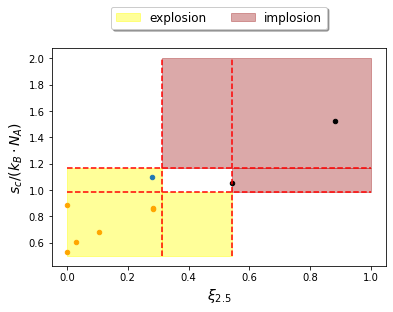

In [33]:
plt.figure()

# demarcation lines
plt.plot([comp_crit1, comp_crit1], [0.5, 2], color = 'red', linestyle = '--')
plt.plot([comp_crit2, comp_crit2], [0.5, 2], color = 'red', linestyle = '--')
plt.plot([0, 1], [sc_crit1, sc_crit1], color = 'red', linestyle = '--')
plt.plot([0, 1], [sc_crit2, sc_crit2], color = 'red', linestyle = '--')

# background shadings for the final fate classification
plt.fill_betweenx([0.5, sc_crit1], [comp_crit1, comp_crit1] , [comp_crit2, comp_crit2], color = "yellow", alpha = 0.4)
plt.fill_between([0.0, comp_crit1], [0.5, 0.5] , [sc_crit2, sc_crit2], color = "yellow", alpha = 0.4, label = 'explosion')

plt.fill_betweenx([sc_crit2, 2.], [comp_crit1, comp_crit1] , [1, 1], color = "brown", alpha = 0.4)
plt.fill_between([comp_crit2, 1], [sc_crit1, sc_crit1], [sc_crit2, sc_crit2] , color = "brown", alpha = 0.4, label = 'implosion')

# label & legend
plt.xlabel(r'$\xi_\mathrm{2.5}$', fontsize = 14)
plt.ylabel(r'$s_c / (k_B \cdot N_A)$', fontsize = 14)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.22), ncol=2, fancybox=True, shadow=True, fontsize = 12)

# progenitor examples
plt.scatter(comp_val, sc_val, s = 20)
plt.scatter(comp_expl, sc_expl, s = 20, color = 'orange')
plt.scatter(comp_impl, sc_impl, s = 20, color = 'black')


### final fate classification in the ($\mu_4M_4, \mu_4$)-plane:

In [29]:
def lin(a1, a2, x):
    return a2 + a1*x

mu4_crit1, mu4_crit2 = 0.108, 0.193

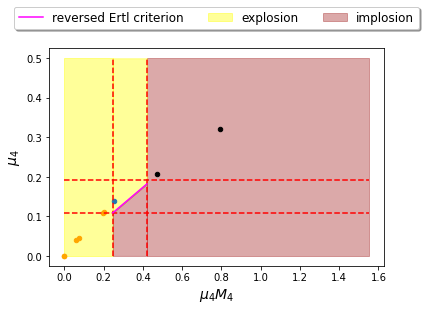

In [73]:
plt.figure()

# demarcation lines
plt.plot([0., 1.55], [mu4_crit1, mu4_crit1], color = 'red', linestyle = '--')
plt.plot([0., 1.55], [mu4_crit2, mu4_crit2], color = 'red', linestyle = '--')
plt.plot([mu4M4_crit1, mu4M4_crit1], [0., 0.5], color = 'red', linestyle = '--')
plt.plot([mu4M4_crit2, mu4M4_crit2], [0., 0.5], color = 'red', linestyle = '--')

# final fate classification in the (mu4M4, mu4)-plane
mu4M4_arr = np.arange(mu4M4_crit1, mu4M4_crit2+0.002, 0.002)
plt.plot(mu4M4_arr, lin(k1,k2, mu4M4_arr), color = 'magenta', label = 'reversed Ertl criterion')

# background shadings for the final fate classification
plt.fill_betweenx([0, 0.5], [0, 0], [mu4M4_crit1, mu4M4_crit1], color = 'yellow', alpha = 0.4, label = 'explosion' )
plt.fill_betweenx([0, 0.5], [mu4M4_crit2, mu4M4_crit2], [1.55, 1.55], color = 'brown', alpha = 0.4, label = 'implosion')
plt.fill_between(mu4M4_arr, 0.5, lin(k1,k2, mu4M4_arr), color = "yellow", alpha = 0.4)
plt.fill_between(mu4M4_arr, 0., lin(k1,k2, mu4M4_arr), color = "brown", alpha = 0.4)

# label & legend
plt.xlabel(r'$\mu_4M_4$', fontsize = 14)
plt.ylabel(r'$\mu_4$', fontsize = 14)

plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.22), ncol=3, fancybox=True, shadow=True, fontsize = 12)

# progenitor examples
plt.scatter(mu4_val*M4_val, mu4_val, s = 20)
plt.scatter(mu4M4_expl, mu4_expl, s = 20, color = 'orange')
plt.scatter(mu4M4_impl, mu4_impl, s = 20, color = 'black')

## 4. Compact remnant type discrimination plots

### remnant type constraints based on  $(M_4/M_\mathrm{CO})$-ratio:

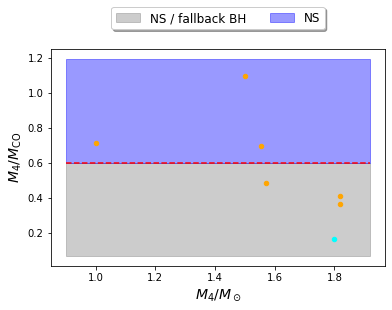

In [52]:
plt.figure()

# demarcation line
plt.plot([np.amin(M4)-0.1, np.amax(M4)+0.1], [0.6, 0.6], color = 'red', linestyle = '--')

# background shadings for the final fate classification
plt.fill_between( [np.amin(M4)-0.1, np.amax(M4)+0.1], [np.amin(M4/mco_expl)-0.3,np.amin(M4/mco_expl)-0.3], [0.6, 0.6], alpha = 0.4, color = 'grey', label = "NS / fallback BH" )
plt.fill_between( [np.amin(M4)-0.1, np.amax(M4)+0.1], [0.6, 0.6], [np.amax(M4/mco_expl)+0.1,np.amax(M4/mco_expl)+0.1], alpha = 0.4, color = 'blue', label = "NS" )

plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.22), ncol=3, fancybox=True, shadow=True, fontsize = 12)
plt.xlabel(r'$M_4/M_\odot$', fontsize = 14)
plt.ylabel(r'$M_4/M_\mathrm{CO}$', fontsize = 14)

# progenitor examples
plt.scatter(M4_val, M4_val/mco_val, s = 20, color = 'cyan')
plt.scatter(M4, M4/mco_expl, s = 20, color = 'orange')

### remnant type constraints in the $(\mu_4M_4,\xi_{2.5})$-plane:

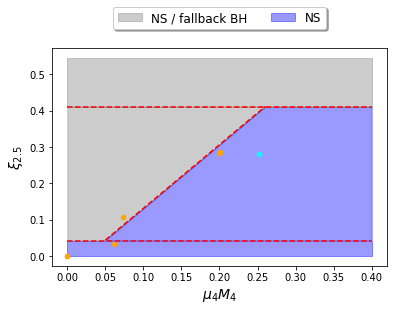

In [75]:
mu4M4_arr = np.linspace(0.05, 0.26, 50)
mu4M42 = np.linspace(0, 0.4, 50)

# demarcation lines
plt.plot(mu4M4_arr, mu4M4_arr*a + b, color = 'red', linestyle = '--')
plt.plot(mu4M42, np.ones_like(mu4M42)*0.41, color = 'red', linestyle = '--')
plt.plot(mu4M42, np.ones_like(mu4M42)*0.04, color = 'red', linestyle = '--')

# BACKGROUND COLORING

# regions mapped out by separation line
plt.fill_betweenx(mu4M4_arr*a + b, np.zeros_like(mu4M4_arr), mu4M4_arr, alpha = 0.4, color = "grey", label = "NS / fallback BH"  )
plt.fill_betweenx(mu4M4_arr*a + b, mu4M4_arr, np.ones_like(mu4M4_arr)*0.4, alpha = 0.4, color = "blue", label = "NS")

# NS / fallback BH formation above compactness threshold
comp_arr2 = np.linspace(0.41, 0.544, 10)
plt.fill_betweenx(comp_arr2, np.zeros_like(comp_arr2), np.ones_like(comp_arr2)*0.4, color = "grey", alpha = 0.4)

# NS formation below compactness threshold
comp_arr3 = np.linspace(0., 0.04, 10)
plt.fill_betweenx(comp_arr3, np.zeros_like(comp_arr3), np.ones_like(comp_arr3)*0.4, color = "blue", alpha = 0.4)

# legend and plot
plt.ylabel(r'$\xi_\mathrm{2.5}$', fontsize = 14)
plt.xlabel(r'$\mu_4M_4$', fontsize = 14)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.22), ncol=3, fancybox=True, shadow=True, fontsize = 12)

# progenitor examples
plt.scatter(mu4M4_expl, comp_expl, s = 20, color = 'orange')
plt.scatter(M4_val*mu4_val, comp_val, s = 20, color = 'cyan')

In [70]:
# Acknowledgement: Kiril Maltsev